# Ensemble-based Rainfall and Temperature Forecasting
### Submitted by:
#### Group-5
> ##### Zarin Sabah Teresa-192281
> ##### Md. Bokhtiar Nadeem Shawon-192318
> ##### Arnab Purkayastha-192334

## Table of Contents
* [Overview of the process](#1)
* [Importing the required libraries](#2)
* [Importing the Weather Dataset](#3)
* [Data Analysis](#4)
    - [Feature Distribution](#41)
    - [EDA](#42)
         - [Average WindSpeed Analysis](#421)
         - [Average Humidity Analysis](#422)
         - [Average Pressure Analysis](#423)
         - [Average Temperature Analysis](#424)
    - [Correlation and Description of the data](#43)
* [Data Preprocessing](#5)
    - [Standardize the Variables](#51)
    - [Transforming Categorical Variables](#52)
* [Rainfall Occurance Prediction](#6)
    - [Training Data and Test Data](#61)
    - [Logistic Regression Model](#62)
    - [KNN Classification Model](#63)
    - [Decision Tree Classification Model](#64)
    - [SVM Classification Model](#65)
    - [Random Forest Classification Model](#66)
    - [Ensembled of the above classification models](#67)
    - [Classification Report on Ranfall Occurance Prediction](#68)
* [Rainfall Amount Prediction](#7)
    - [Training Data and Test Data](#71)
    - [Linear Regression](#72)
    - [Random Forest Regression Model](#73)
    - [SVM Regression Model](#74)
    - [Ensembled of the above Regression Models](#75)
    - [Regression report on rainfall amount prediction](#76)
* [Rainfall Occurance Prediction](#8)
    - [Training Data and Test Data](#81)
    - [Linear Regression](#82)
    - [Random Forest Regression Model](#83)
    - [SVM Regression Model](#84)
    - [Ensembled of the above Regression Models](#85)
    - [Regression report on average temperature prediction](#86)

<a id="1"></a>
# 1. Overview of the process


<p style=" text-align: justify;">We are utilizing a diverse ensemble of five distinct machine learning models to conduct predictive analyses on historical dataset pertaining to rainfall, minimum, and maximum temperatures. These models are characterized by their unique methodologies, each possessing specific strengths and capabilities. Our approach entails the incorporation of both classification and regression algorithms, thereby encompassing a comprehensive array of techniques to effectively address the intricacies associated with this multifaceted task. </p>

In terms of classifying weather or not rainfall will occur, we will be utilizing-
> 1. Logistic Regression
> 2. Decision Tree Classification
> 3. Random Forest Classification
> 4. K-Nearest Neighbors
> 5. Support Vector Classifier

Furthermore, In terms of predicting rainfall amount or average temperature of a day, our regression-based algorithms will include-
> 1. Linear Regression
> 2. Random Forest Regression
> 3. Support Vector Regression

<b>Ensemble Classifier Regressor:</b> <br>
<p style="text-align: justify;">To achieve comprehensive predictions, our methodology also involves an ensemble classifier. The ensemble classifier operates on a principle of consensus and voting, embodying a collective wisdom that transcends the limitations of any single model. As the classifiers generate their independent forecasts, the ensemble classifier amalgamates these predictions, leading to a dynamic and balanced output that represents the collective insight of the entire ensemble. Specifically, the ensemble classifier will make predictions about the occurrence of rainfall based on historical data patterns. This aggregated result is achieved through intricate mechanisms that
prioritize reliability, accuracy, and robustness. By cultivating harmony among the classifiers, the ensemble classifier fortifies its predictive ability and diminishes the influence of any potential outliers or biases present in the individual models. </p>

We will evaluate our models using:

> 1.  Accuracy Score
> 2.  F1-Score
> 3.  Mean Absolute Error
> 4.  Mean Squared Error

Finally, we will use models to generate the report displaying the accuracy scores.


<a id="2"></a>
# 2. Importing the required libraries


Here, required Python packages have been imported for the analysis.

- The **pandas**, **numpy** packages are required for basic analysis.
- The **matplotlib**, **seaborn** packages are used for visualization purpose.
- The **sklearn** package is used for importing ML models for classification and regression.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, VotingClassifier,VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics
import seaborn as sns

: 

<a id="3"></a>
# 3. Importing the Weather Dataset


In [3]:
df = pd.read_csv('../input/weatherdatabangladesh/Weather_Data.csv')
df.head()

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8


<a id="4"></a>
# 4. Data Analysis


## 4.1. Feature Distribution
<a id="41"></a>

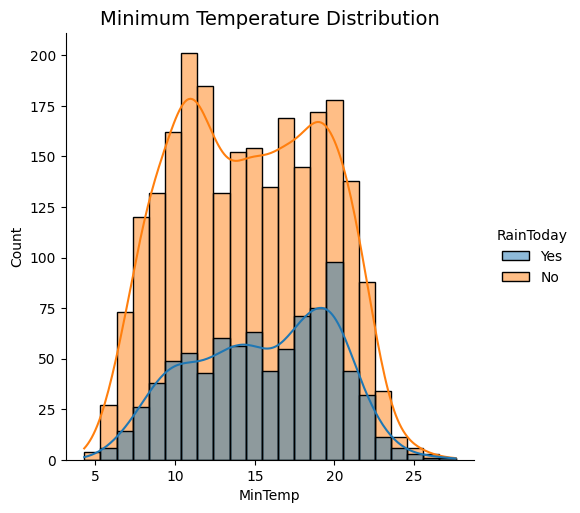

In [4]:
sns.displot(df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

During the analysis it has been found that the range of minimum temperature is from 4.3$^\circ$C to 27.6$^\circ$C and 11 and 20$^\circ$C minimum temperature has the highest frequency in the dataset.

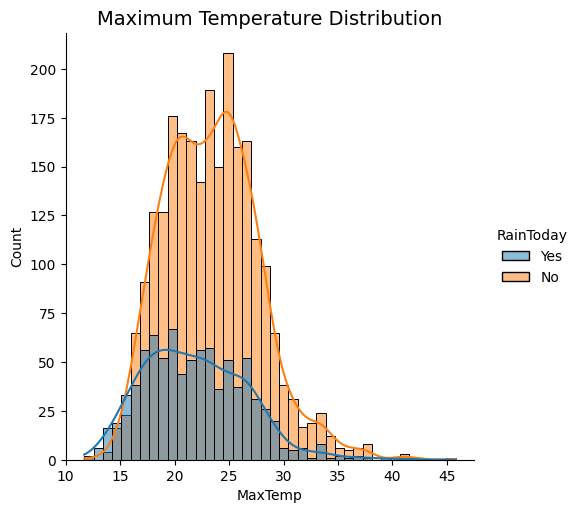

In [5]:
sns.displot(df, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

On the other hand, the range of maximum temperature is from  11.7$^\circ$C to 45.8$^\circ$C and 25$^\circ$C maximum temperature has the highest frequency in the dataset.

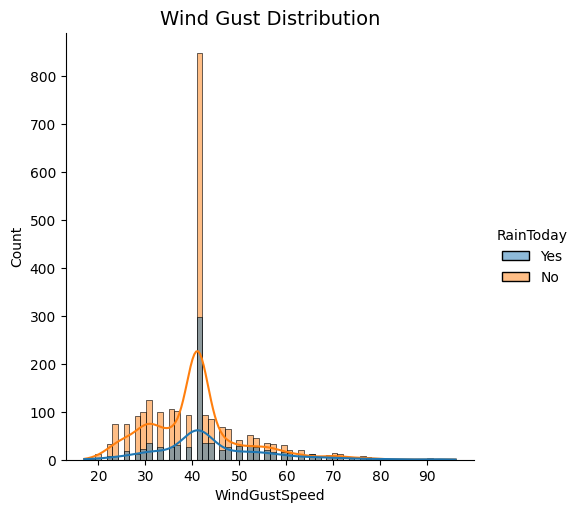

In [6]:
sns.displot(df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of strong wind gusts is from 17 compass points to 97 compass points and 43 compass points of wind gusts have the highest frequency in the dataset.

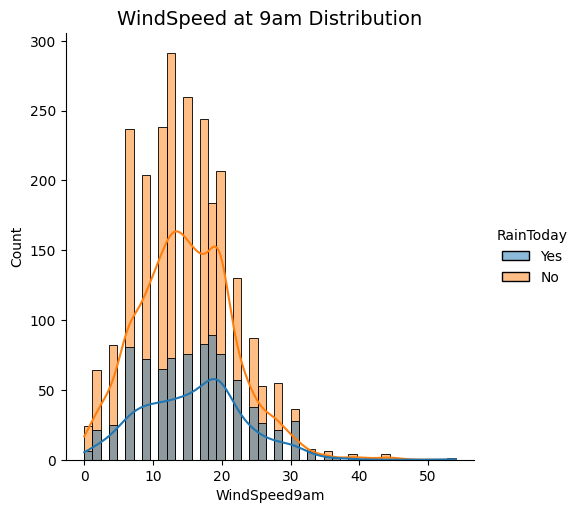

In [7]:
sns.displot(df, x="WindSpeed9am", hue='RainToday', kde=True)
plt.title("WindSpeed at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of wind speed at 9 am is from 0 kmph to 57 kmph and 12 kmph of wind speed has the highest frequency in the dataset.

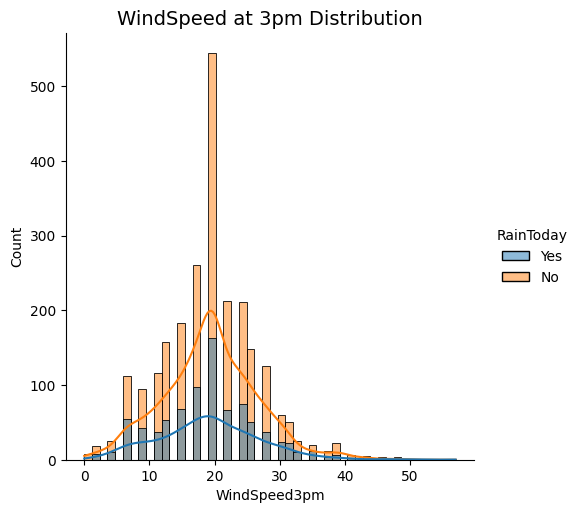

In [8]:
sns.displot(df, x="WindSpeed3pm", hue='RainToday', kde=True)
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, the range of wind speed at 3 pm is from 0 kmph to 57 kmph and 19 kmph of wind speed has the highest frequency in the dataset.

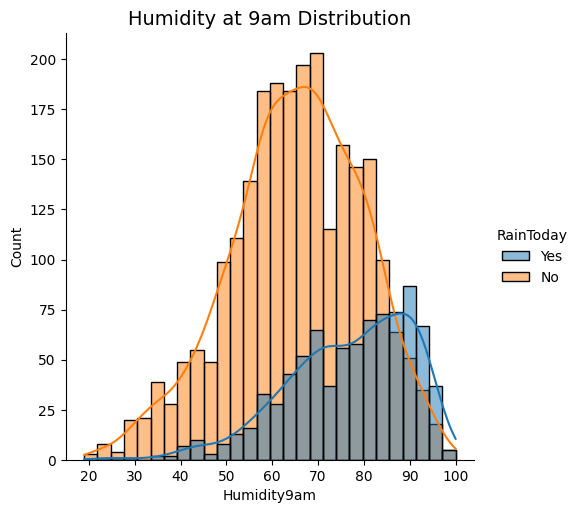

In [9]:
sns.displot(df, x="Humidity9am", hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of humidity at 9 am and 3 pm is from 19% to 100% and 70% of humidity at 9 am has the highest frequency in the dataset.

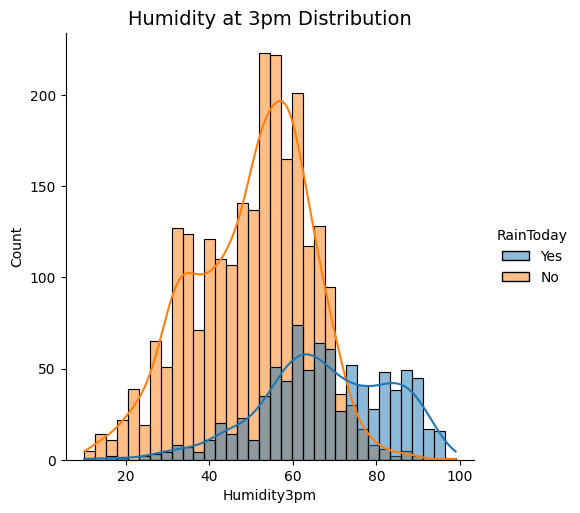

In [10]:
sns.displot(df, x="Humidity3pm", hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, 47.58% of humidity at 3 pm has the highest frequency in the dataset.

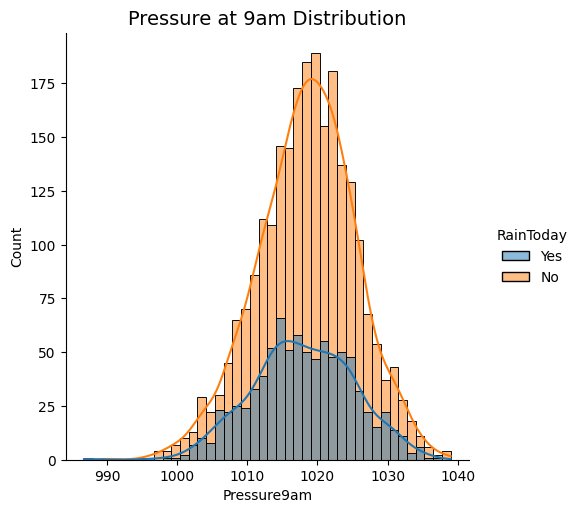

In [11]:
sns.displot(df, x="Pressure9am", hue='RainToday', kde=True)
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of wind pressure at 9 am is from 980.5 hPa to 1042 hPa and 1024.68 hPa of pressure has the highest frequency in the dataset.

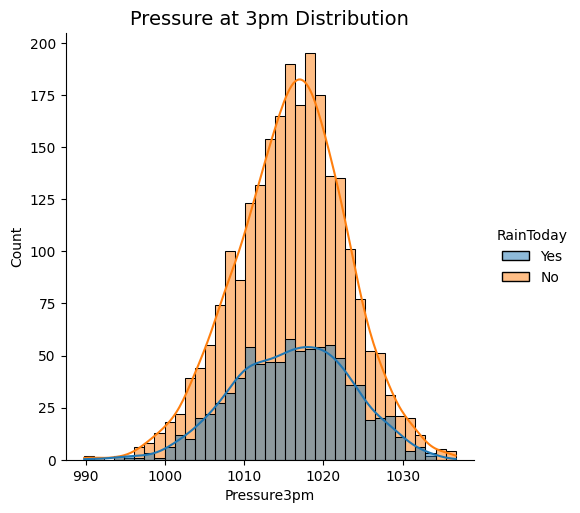

In [12]:
sns.displot(df, x="Pressure3pm", hue='RainToday', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, the range of pressure at 3 pm is from 988.2 hPa to 1039.6 hPa and 1015.28 hPa of pressure has the highest frequency in the dataset.

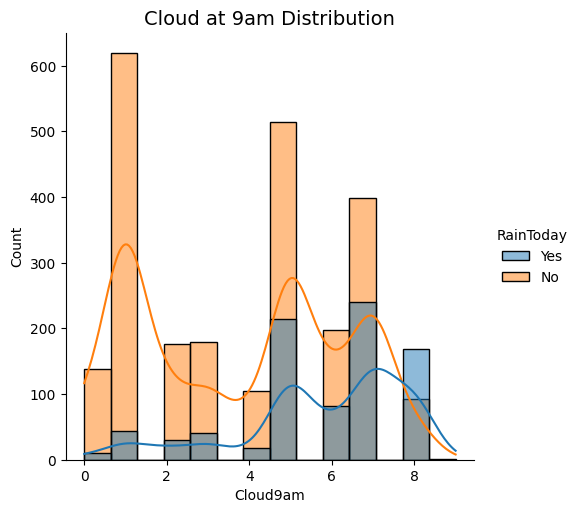

In [13]:
sns.displot(df, x="Cloud9am", hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of cloud at 9 am and 3 pm is from 0 eighths to 9 eighths and 1.44 eighths of cloud at 9 am has the highest frequency in the dataset.

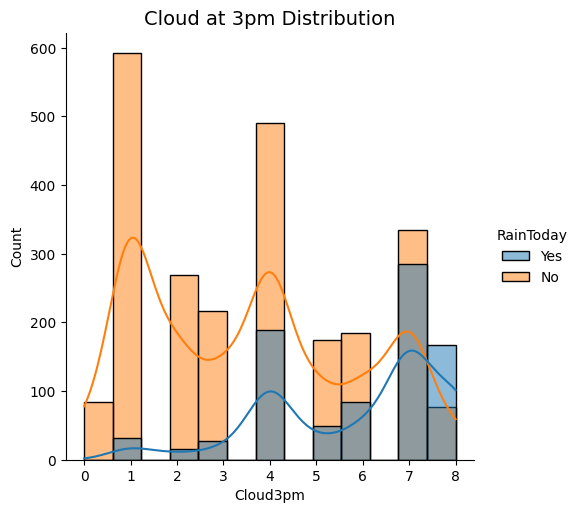

In [14]:
sns.displot(df, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, 1 eighths of cloud at 3 pm has the highest frequency in the dataset.

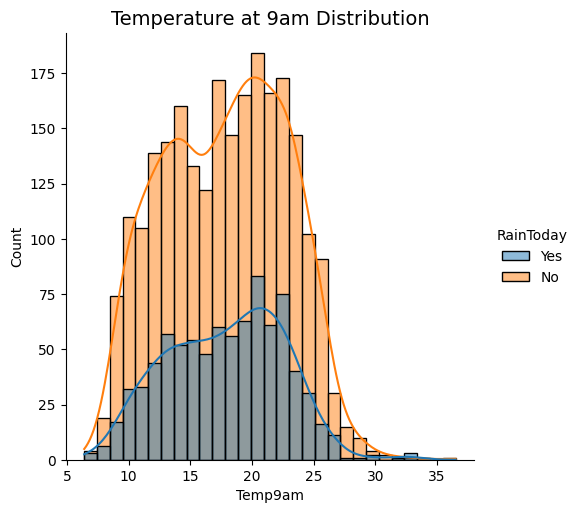

In [15]:
sns.displot(df, x="Temp9am", hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of wind temperature at 9 am is from 5$^\circ$C to 37$^\circ$C and 23$^\circ$C of temperature has the highest frequency in the dataset.

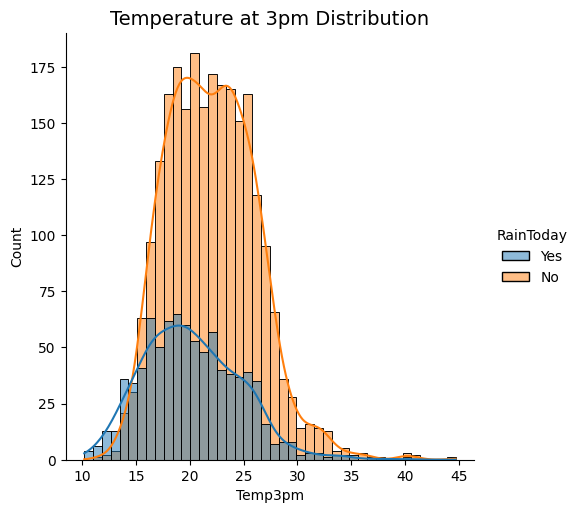

In [16]:
sns.displot(df, x="Temp3pm", hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, the range of pressure at 3 pm is from 10.8$^\circ$C to 44.7$^\circ$C and 21.68$^\circ$C of temperature has the highest frequency in the dataset.

## 4.2. EDA
<a id="42"></a>

### 4.2.1. Average WindSpeed Analysis
<a id="421"></a>

In [17]:
windspeed_weather_df = df.groupby(df['Date'].str[3:5])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df

,Date,WindSpeed9am,WindSpeed3pm
0,01,15.285171,17.403042
1,02,15.468504,18.228346
2,03,15.989247,18.053763
3,04,16.466667,19.396296
4,05,16.580645,18.419355
5,06,15.077778,18.807407
6,07,14.612903,20.229391
7,08,13.645161,20.114695
8,09,13.818519,21.203704
9,10,13.896057,21.007168


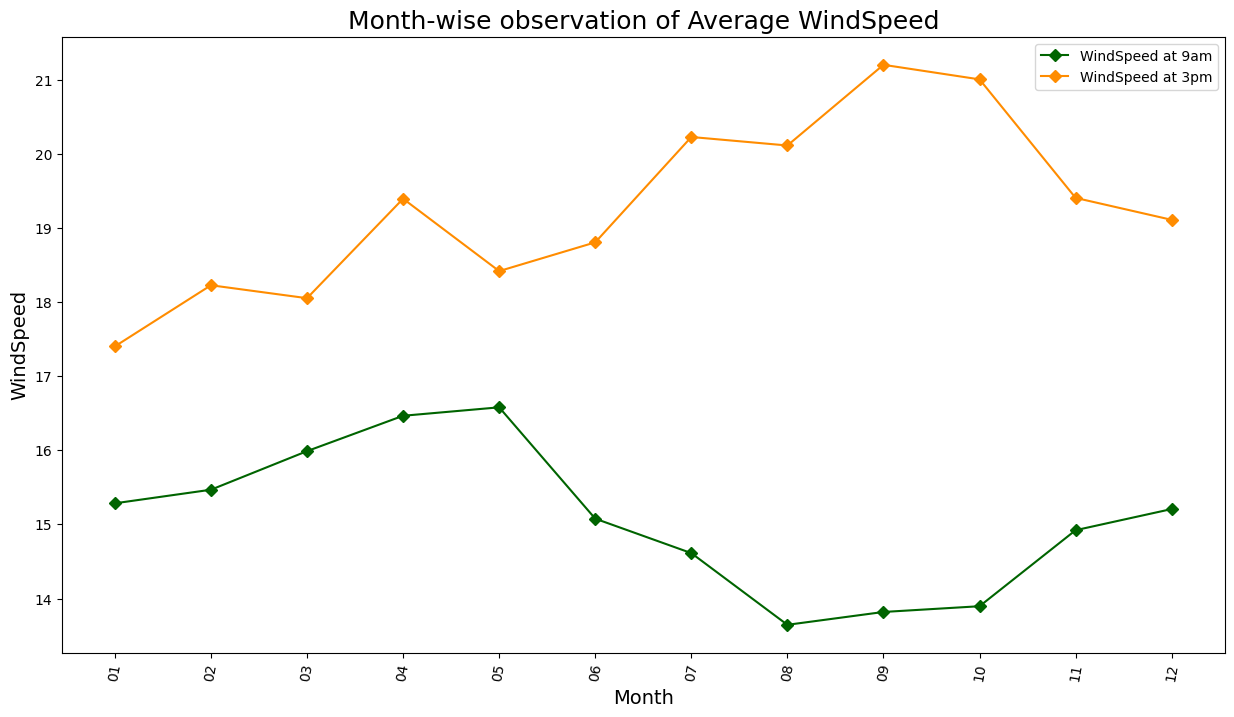

In [18]:
x = windspeed_weather_df.loc[:, 'Date']
y1 = windspeed_weather_df['WindSpeed9am'] 
y2 = windspeed_weather_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'WindSpeed at 9am') 
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'WindSpeed at 3pm')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Month-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

During this analysis, it has been found that the wind speed between the month of May and June at 9 am has the highest wind speed at 16.5 kmph. On the other hand, at 3 pm between month August and September has the highest wind speed at 21.77 kmph. Finally, it can be concluded that the wind speed at 3 pm is much higher than the wind speed at 9 am.

### 4.2.2. Average Humidity Analysis
<a id="422"></a>

In [19]:
humidity_weather_df = df.groupby(df['Date'].str[3:5])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df

,Date,Humidity9am,Humidity3pm
0,01,73.574144,57.136882
1,02,72.830709,56.468504
2,03,68.519713,52.698925
3,04,67.285185,52.374074
4,05,64.014337,49.906810
5,06,66.433333,54.000000
6,07,65.179211,52.333333
7,08,64.164875,52.867384
8,09,65.844444,56.100000
9,10,71.197133,59.139785


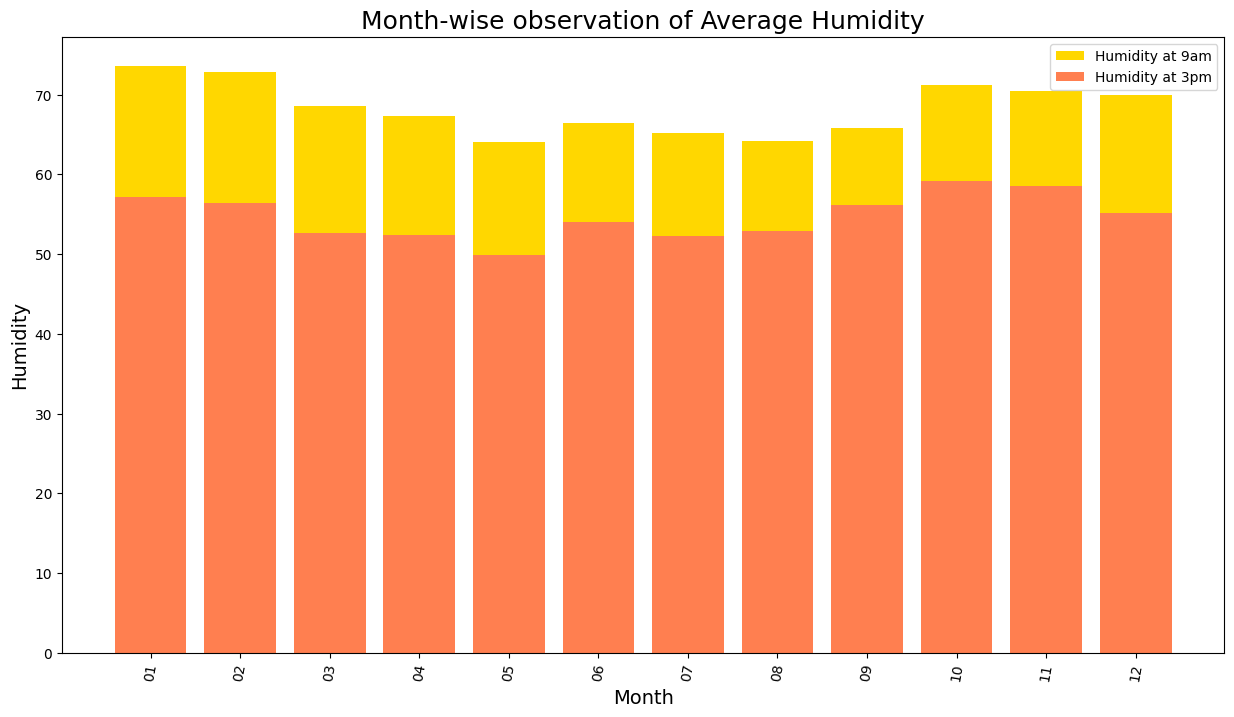

In [20]:
x = humidity_weather_df.loc[:, 'Date']
y1 = humidity_weather_df['Humidity9am'] 
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize = (15, 8))

plt.bar(x, y1, color = 'gold', label = 'Humidity at 9am') 
plt.bar(x, y2, color = 'coral',label = 'Humidity at 3pm')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title('Month-wise observation of Average Humidity', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

During this analysis, it has been found that the humidity between the month January and February at 9 am has the highest humidity as 74.38%. On the other hand, at 3 pm , between the month September and Octorber has the highest humidity as 58.24%. Finally, it can be concluded that humadity at 9 am is much higher than the humadity at 3 pm.

### 4.2.3. Average Pressure Analysis
<a id="423"></a>

In [21]:
pressure_weather_df = df.groupby(df['Date'].str[3:5])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df

,Date,Pressure9am,Pressure3pm
0,01,1019.358175,1017.123574
1,02,1018.531496,1016.374803
2,03,1020.687097,1018.254122
3,04,1020.229630,1017.622222
4,05,1019.886738,1017.269391
5,06,1018.396667,1015.952593
6,07,1017.147670,1014.789964
7,08,1015.941577,1013.565789
8,09,1016.675556,1014.475100
9,10,1018.082079,1016.032258


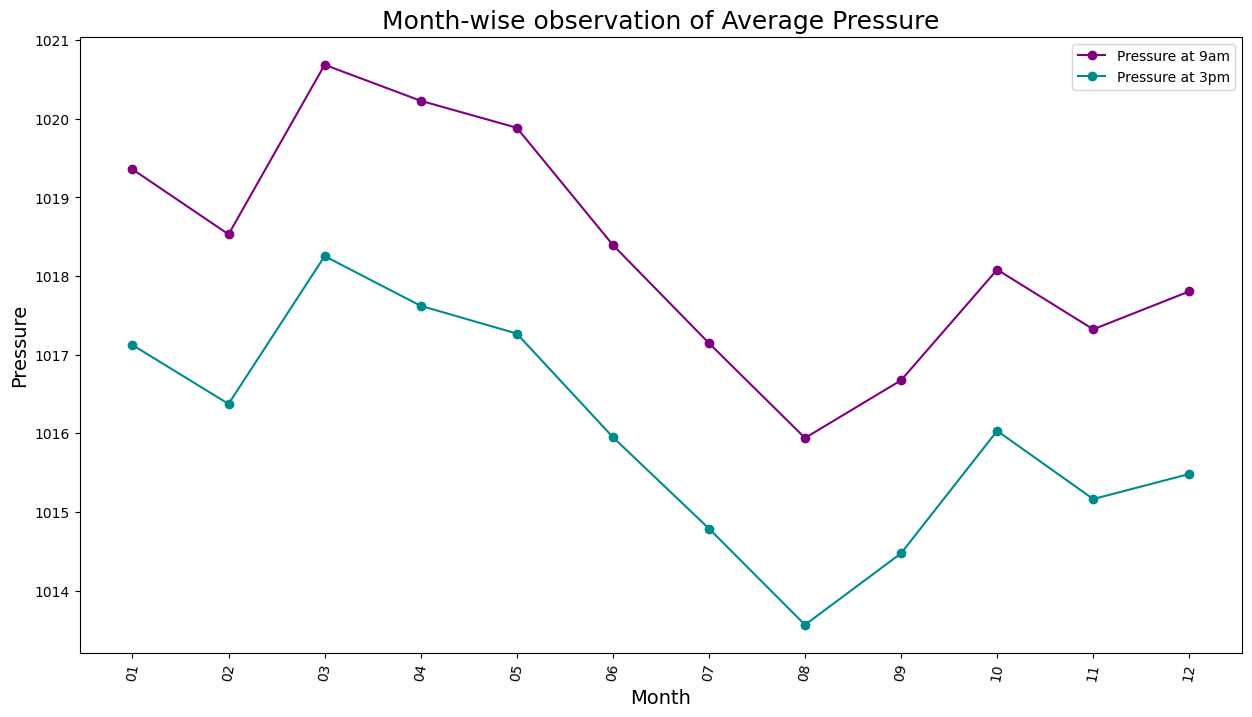

In [22]:
x = pressure_weather_df.loc[:, 'Date']
y1 = pressure_weather_df['Pressure9am'] 
y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'purple', label = 'Pressure at 9am') 
plt.plot(x, y2, marker='o', color = 'darkcyan', label = 'Pressure at 3pm')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Pressure', fontsize = 14)
plt.title('Month-wise observation of Average Pressure', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

During this analysis, it has been found that the pressure  between the month of March and April at 9 am has the highest pressure as 1022.93 hPa. On the other hand, at 3 pm, between the month March and April has the highest pressure as 1018.79 hPa. Finally, it can be concluded that pressure at 9 am is much higher than the pressure at 3 pm.

### 4.2.4. Average Temperature Analysis
<a id="424"></a>

In [23]:
location_weather_df = df.groupby(df['Date'].str[3:5])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df

,Date,MinTemp,MaxTemp,Temp9am,Temp3pm
0,01,14.851331,22.621673,17.158555,21.422814
1,02,14.154331,21.984252,16.439764,20.783858
2,03,12.713620,21.339068,15.451971,20.127599
3,04,12.600000,21.145926,15.721111,19.736667
4,05,12.651971,21.878495,15.939785,20.335125
5,06,13.621852,22.000741,16.786296,20.429259
6,07,14.223297,22.521505,17.465591,20.882437
7,08,15.870251,24.025090,19.237276,22.390323
8,09,17.608148,25.315926,21.029630,23.648889
9,10,17.709319,24.853047,20.483154,23.400000


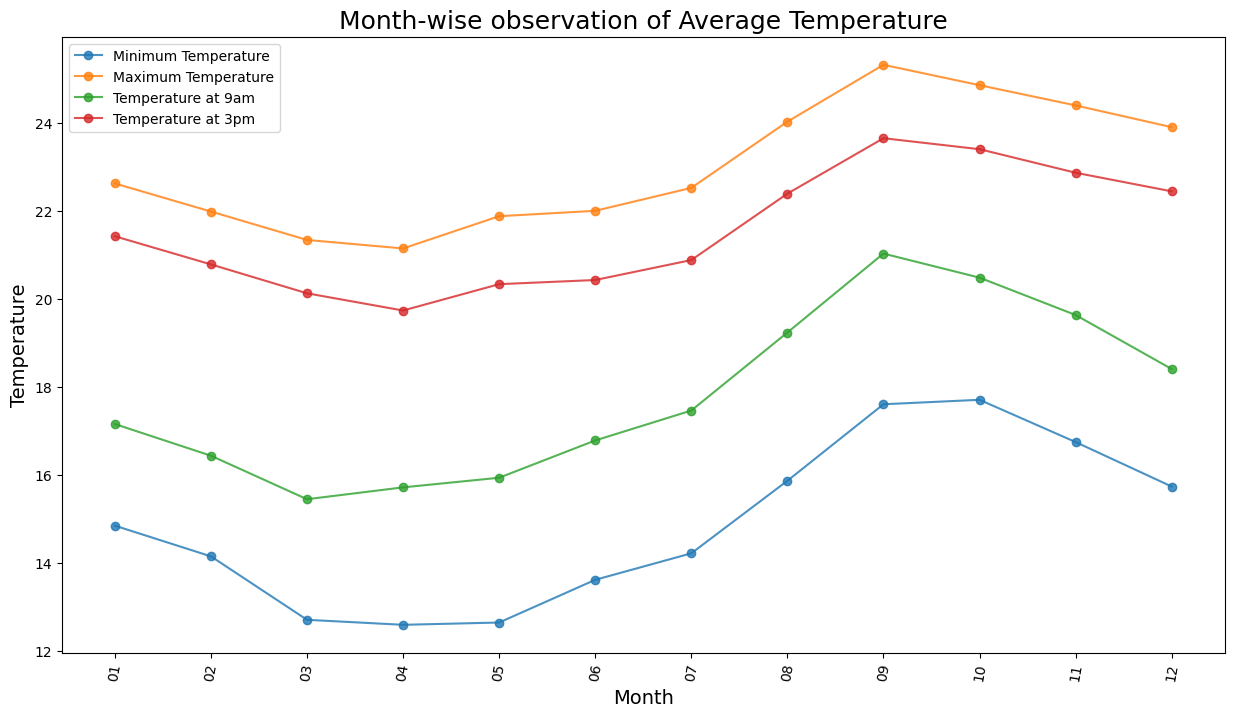

In [24]:
x = location_weather_df.loc[:, 'Date']
y1 = location_weather_df['MinTemp'] 
y2 = location_weather_df['MaxTemp']
y3 = location_weather_df['Temp9am'] 
y4 = location_weather_df['Temp3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, label = 'Minimum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y2, label = 'Maximum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y3, label = 'Temperature at 9am', marker='o', alpha = 0.8) 
plt.plot(x, y4, label = 'Temperature at 3pm', marker='o', alpha = 0.8)

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Month-wise observation of Average Temperature', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

## 4.3. Correlation and Description of the data
<a id="43"></a>

In [25]:
df.describe()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,17.821461,21.543656,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093
std,4.894316,4.297053,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274
min,6.400000,10.200000,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000
25%,13.800000,18.400000,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000
50%,18.200000,21.300000,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000
75%,21.700000,24.500000,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000
max,36.500000,44.700000,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000


Finding the correlation values

In [26]:
bf=df.drop(columns=['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [27]:
bf.corr()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
Temp9am,1.000000,0.828457,0.939307,0.858639,-0.054297,0.606122,0.113891,0.159570,-0.334084,0.280009,-0.145944,0.131855,-0.417437,-0.401353,0.093204,0.068683
Temp3pm,0.828457,1.000000,0.753147,0.960805,-0.142748,0.474599,0.345528,0.036216,-0.351836,0.136713,-0.155192,-0.212696,-0.342862,-0.387945,-0.086544,-0.144965
MinTemp,0.939307,0.753147,1.000000,0.771005,0.013995,0.569316,-0.063475,0.127792,-0.298040,0.225905,0.053946,0.273269,-0.391654,-0.353334,0.241248,0.164028
MaxTemp,0.858639,0.960805,0.771005,1.000000,-0.139306,0.510334,0.327422,0.073184,-0.349382,0.155542,-0.185382,-0.150741,-0.385853,-0.420375,-0.084695,-0.099217
Rainfall,-0.054297,-0.142748,0.013995,-0.139306,1.000000,-0.110343,-0.308962,0.149811,0.153696,0.039415,0.332636,0.305635,-0.037561,0.001780,0.245231,0.200999
Evaporation,0.606122,0.474599,0.569316,0.510334,-0.110343,1.000000,0.175932,0.245426,-0.077532,0.292469,-0.395651,-0.102295,-0.343581,-0.298303,-0.037051,-0.038422
Sunshine,0.113891,0.345528,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.029032,-0.058410,0.177813,-0.490631,-0.586476,-0.047789,-0.094507,-0.665014,-0.677861
WindGustSpeed,0.159570,0.036216,0.127792,0.073184,0.149811,0.245426,-0.029032,1.000000,0.256460,0.509825,-0.225613,-0.095037,-0.408876,-0.351850,0.024275,0.044016
WindSpeed9am,-0.334084,-0.351836,-0.298040,-0.349382,0.153696,-0.077532,-0.058410,0.256460,1.000000,0.197669,-0.189763,-0.148849,0.003737,0.091878,-0.062441,-0.018030
WindSpeed3pm,0.280009,0.136713,0.225905,0.155542,0.039415,0.292469,0.177813,0.509825,0.197669,1.000000,-0.288910,-0.135039,-0.333810,-0.277749,-0.050932,-0.095435


<Axes: >

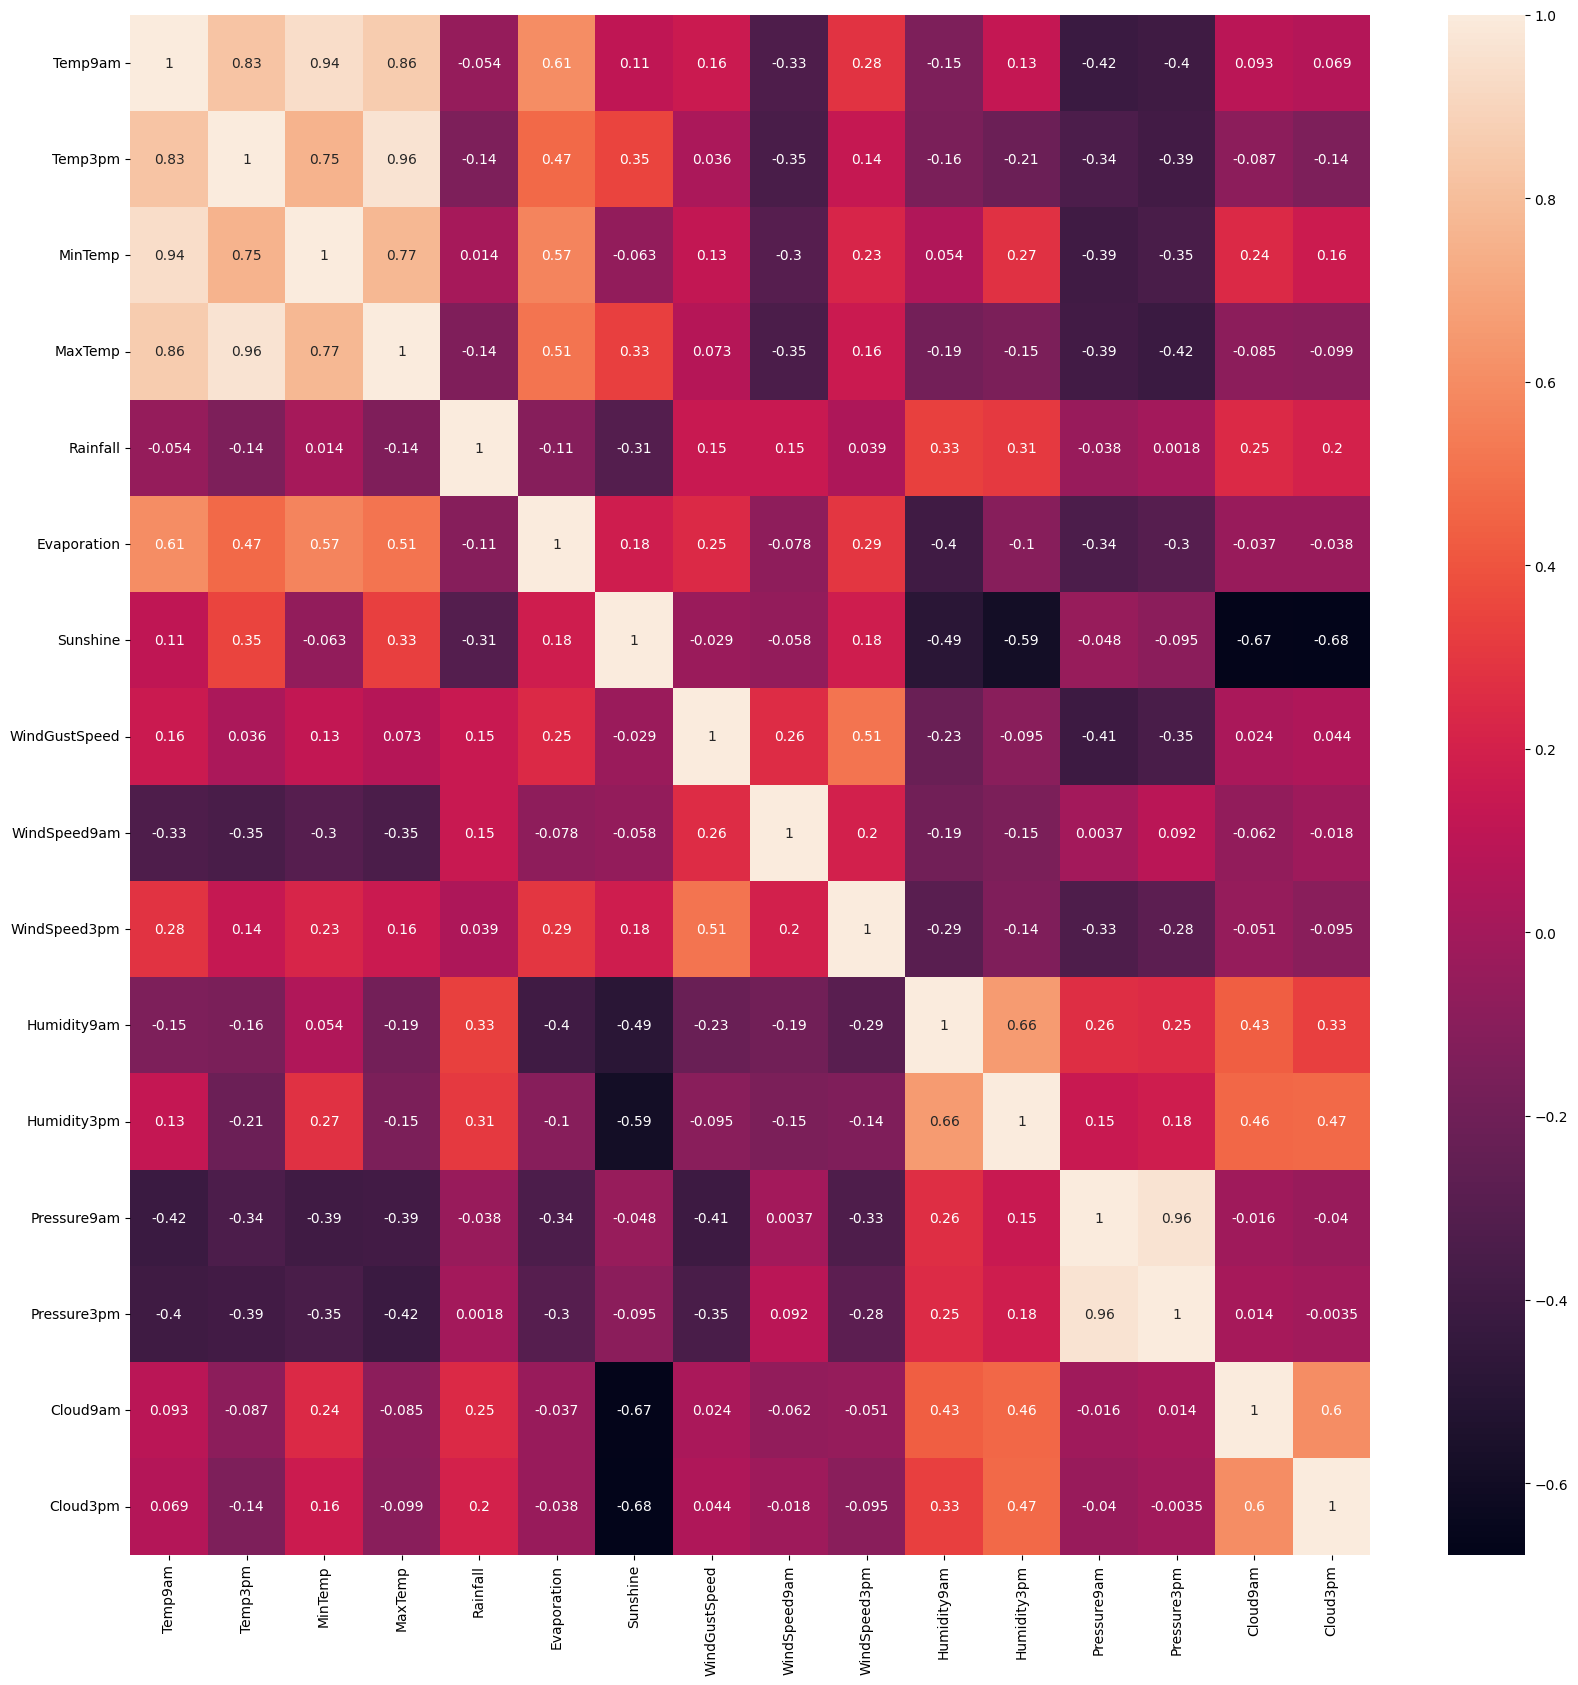

In [28]:
plt.figure(figsize=(20, 20))
sns.heatmap(bf.corr(), annot=True)

# 5. Data Preprocessing
<a id="5"></a>


## 5.1. Standardize the Variables
<a id="51"></a>

Because the classifier and regressor predicts the class/values of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observation.

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(bf)

StandardScaler()

In [32]:
scaled_features = scaler.transform(bf)

In [33]:
df_feat = pd.DataFrame(scaled_features,columns=bf.columns[:16])
selected_columns = df[['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']]
df_feat[['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']] = selected_columns.copy()
df_feat.head()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Date,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,0.588229,-0.149813,1.015126,-0.135078,1.236139,0.371460,-1.878965,-0.044081,0.273041,0.094683,...,1.800202,-0.104633,0.199024,1.457110,1.586088,01-02-13,Yes,W,S,SSW
1,0.935624,0.757924,1.015126,0.578719,0.268029,-0.644040,-1.171303,-0.044081,-0.862879,-0.844638,...,1.124391,-0.061892,0.056550,1.061312,1.171306,02-02-13,Yes,W,W,E
2,1.160409,0.338969,1.476258,0.333351,0.328536,-1.006719,-1.852755,-0.044081,0.273041,-2.320714,...,1.923076,-0.232857,-0.057429,1.061312,1.586088,03-02-13,Yes,W,ESE,ESE
3,0.731274,-0.149813,1.168837,-0.045853,1.558843,-1.079254,-1.878965,-0.044081,0.982991,0.094683,...,2.168826,-0.589032,-0.598829,1.457110,1.586088,04-02-13,Yes,W,NNE,E
4,0.956059,0.920852,1.059043,0.601025,7.468346,-0.136290,-1.878965,-0.044081,-0.578899,-1.783959,...,1.185828,-1.429605,-1.596144,1.457110,1.586088,05-02-13,Yes,W,NNE,W


## 5.2. Transforming Categorical Variables
<a id="52"></a>


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [34]:
df_proc = pd.get_dummies(data=df_feat, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_proc.head()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.588229,-0.149813,1.015126,-0.135078,1.236139,0.371460,-1.878965,-0.044081,0.273041,0.094683,...,False,False,False,False,False,True,False,False,False,False
1,0.935624,0.757924,1.015126,0.578719,0.268029,-0.644040,-1.171303,-0.044081,-0.862879,-0.844638,...,False,False,False,False,False,False,False,False,False,False
2,1.160409,0.338969,1.476258,0.333351,0.328536,-1.006719,-1.852755,-0.044081,0.273041,-2.320714,...,False,False,False,False,False,False,False,False,False,False
3,0.731274,-0.149813,1.168837,-0.045853,1.558843,-1.079254,-1.878965,-0.044081,0.982991,0.094683,...,False,False,False,False,False,False,False,False,False,False
4,0.956059,0.920852,1.059043,0.601025,7.468346,-0.136290,-1.878965,-0.044081,-0.578899,-1.783959,...,False,False,False,False,False,False,False,True,False,False


Next, we replace the values of the 'RainToday' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainToday' and we do not want, since 'RainToday' is our target.


In [35]:
df_proc.replace(['No', 'Yes'], [0,1], inplace=True)
df_proc[['Date','RainToday']]

,Date,RainToday
0,01-02-13,1
1,02-02-13,1
2,03-02-13,1
3,04-02-13,1
4,05-02-13,1
...,...,...
3266,11-01-22,0
3267,12-01-22,0
3268,13-01-22,0
3269,14-01-22,0


In [36]:
df_proc.drop('Date',axis=1,inplace=True)

# 6. Rainfall Occurance Prediction
<a id="6"></a>


 For this we will split our dataset

## 6.1. Training Data and Test Data
<a id="61"></a>


Now, we set our 'features' or x values and our Y or target variable.


In [37]:
df_proc = df_proc.astype(float)

We need to predict if the rain will fall or not. So we choose the RainToday column as the target.

In [38]:
features = df_proc.drop(columns='RainToday', axis=1)
Y = df_proc['RainToday']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

##### Here we have used `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.35` and the `random_state` set to `101`.


## 6.2. Logistic Regression Model
<a id="62"></a>


 Now we will create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`).


In [40]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

## 6.3. KNN Classification Model
<a id="63"></a>


Now we will create and train a KNN model  with the `n_neighbors` parameter set to `4`.


In [41]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

## 6.4. Decision Tree Classification Model
<a id="64"></a>


Now we will create and train a Decision Tree model using the training data (`x_train`, `y_train`).


In [42]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

## 6.5. SVM Classification Model
<a id="65"></a>


Now we will create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [43]:
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

## 6.6. Random Forest Classification Model
<a id="66"></a>

Now we will create and train a Random Forest model  using the training data (`x_train`, `y_train`).


In [44]:
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train, y_train)

RandomForestClassifier()

## 6.7. Ensembled of the above classification models
<a id="67"></a>

In [45]:
eclf = VotingClassifier(estimators=[('lr',LR ), ('knn', KNN), ('dt', Tree),('svc', SVM),('RFC', RFC)],voting='hard')
eclf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=4)),
                             ('dt', DecisionTreeClassifier()),
                             ('svc', SVC(kernel='linear')),
                             ('RFC', RandomForestClassifier())])

This model will predict the output according to voting of the above 5 classification algorithms.

## 6.8. Classification Report on Ranfall Occurance Prediction
<a id="68"></a>

Showing the Accuracy and F1-Score in a tabular format using data frame for all of the above models along with the Ensembled classifer to predict Rainfall occurance.

In [46]:
LR_Accuracy_Score=metrics.accuracy_score(LR.predict(x_test),y_test)
KNN_Accuracy_Score=metrics.accuracy_score(KNN.predict(x_test.values),y_test)
Tree_Accuracy_Score=metrics.accuracy_score(Tree.predict(x_test.values),y_test)
SVM_Accuracy_Score=metrics.accuracy_score(SVM.predict(x_test.values),y_test)
RFC_Accuracy_Score=metrics.accuracy_score(RFC.predict(x_test.values),y_test)
eclf_Accuracy_Score=metrics.accuracy_score(eclf.predict(x_test.values),y_test)

LR_F1_Score=metrics.f1_score(LR.predict(x_test),y_test)
KNN_F1_Score=metrics.f1_score(KNN.predict(x_test.values),y_test,average='weighted')
Tree_F1_Score=metrics.f1_score(Tree.predict(x_test.values),y_test)
SVM_F1_Score=metrics.f1_score(SVM.predict(x_test.values),y_test)
RFC_F1_Score=metrics.f1_score(RFC.predict(x_test.values),y_test)
eclf_F1_Score=metrics.f1_score(eclf.predict(x_test.values),y_test)

Report = {'Classification Algorithm': ['Logistic Regression','KNN', 'Decision Tree',  'SVM','Random Forest','Ensembled Classifier'],
          'Accuracy Score': [LR_Accuracy_Score,KNN_Accuracy_Score, Tree_Accuracy_Score, SVM_Accuracy_Score, RFC_Accuracy_Score,eclf_Accuracy_Score],
          'F1-score': [LR_F1_Score,KNN_F1_Score, Tree_F1_Score, SVM_F1_Score, RFC_F1_Score,eclf_F1_Score],}
Report = pd.DataFrame(Report)
Report

,Classification Algorithm,Accuracy Score,F1-score
0,Logistic Regression,0.823581,0.620301
1,KNN,0.800000,0.825270
2,Decision Tree,0.772052,0.585056
3,SVM,0.828821,0.618677
4,Random Forest,0.824454,0.598802
5,Ensembled Classifier,0.834934,0.616633


In [47]:
import plotly.express as px

In [48]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Accuracy Score'], name='Accuracy Score'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['F1-score'], name='F1-score'), row=1,col=1
)
fig.update_layout(title_text="Accuracy Scores Of Classification Algorithms")
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_xaxes(title_text="Classification Algorithm", row=1, col=1)
fig.show()

##### Here is the visualisation of the classfication algorithm performance with the ensembled classifiers

# 7. Rainfall Amount Prediction
<a id="7"></a>


For this we will split our dataset

## 7.1. Training Data and Test Data
<a id="71"></a>


Now, we set our 'features' or x values and our Y or target variable.


In [49]:
df_proc = df_proc.astype(float)

We need to predict the rainfall of a particular day in mm unit. So we choose the Rainfall column as the target.

In [50]:
features = df_proc.drop(columns='Rainfall', axis=1)
Y = df_proc['Rainfall']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

##### Here we have used `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.35` and the `random_state` set to `101`.


## 7.2. Linear Regression
<a id="72"></a>


Now we will create and train a LinearRegression model called LinearReg using the training data (`x_train`, `y_train`).

In [52]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

## 7.3. Random Forest Regression Model
<a id="73"></a>


Now we will create and train a RandomForest model called RFR using the training data (`x_train`, `y_train`).


In [53]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

## 7.4. SVM Regression Model
<a id="74"></a>


Now we will create and train a SVM model called SVRR using the training data (`x_train`, `y_train`).

In [54]:
SVRR = SVR()
SVRR.fit(x_train, y_train)

SVR()

## 7.5. Ensembled of the above Regression Models
<a id="75"></a>

In [55]:
ereg = VotingRegressor(estimators=[('LinearReg',LinearReg),('RandomForest', RFR), ('SVR',SVRR)],weights=[1,2,3])
ereg.fit(x_train, y_train)

VotingRegressor(estimators=[('LinearReg', LinearRegression()),
                            ('RandomForest', RandomForestRegressor()),
                            ('SVR', SVR())],
                weights=[1, 2, 3])

This model will predict the output according to voting of the above 2 regression algorithms.

## 7.6. Regression report on rainfall amount prediction
<a id="76"></a>


Here the MAE and RMSE is shown in a tabular format using data frame for each of model along with the ensembled of them.

In [56]:
LinearRegression_MAE = metrics.mean_absolute_error(LinearReg.predict(x_test), y_test)
LinearRegression_MSE = metrics.mean_squared_error(LinearReg.predict(x_test), y_test, squared=False)

RandomForest_MAE = metrics.mean_absolute_error(RFR.predict(x_test), y_test)
RandomForest_MSE = metrics.mean_squared_error(RFR.predict(x_test), y_test, squared=False)

SVM_MAE = metrics.mean_absolute_error(SVRR.predict(x_test), y_test)
SVM_MSE = metrics.mean_squared_error(SVRR.predict(x_test), y_test, squared=False)

ereg_MAE = metrics.mean_absolute_error(ereg.predict(x_test), y_test)
ereg_MSE = metrics.mean_squared_error(ereg.predict(x_test), y_test, squared=False)

Report = {'Regression Algorithm': ['Linear Regression','Random Forest', 'SVM','Ensemble Regression'],
          'MAE': [LinearRegression_MAE,RandomForest_MAE, SVM_MAE,ereg_MAE],
          'RMSE': [LinearRegression_MSE,RandomForest_MSE, SVM_MSE,ereg_MSE],}
Report = pd.DataFrame(Report)
Report

,Regression Algorithm,MAE,RMSE
0,Linear Regression,0.498774,0.948272
1,Random Forest,0.378752,0.876934
2,SVM,0.365070,0.971967
3,Ensemble Regression,0.363836,0.907485


In [57]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['MAE'], name='MAE'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['RMSE'], name='RMSE'), row=1,col=1
)
fig.update_layout(title_text="Error of Regression Algorithms")
fig.update_yaxes(title_text="Error", row=1, col=1)
fig.update_xaxes(title_text="Regression Algorithm", row=1, col=1)
fig.show()

# 8. Average Temperature  of a day Prediction
<a id="8"></a>


For this we will split our dataset

## 8.1. Training Data and Test Data
<a id="81"></a>


Now, we set our 'features' or x values and our Y or target variable.


In [58]:
df_proc = df_proc.astype(float)

We need to predict the average temperature of a particular day in celcius unit. So we choose the a new column called AvgTemp as the target.

In [59]:
df_proc['AvgTemp']=df_proc[['Temp9am', 'Temp3pm','MinTemp','MaxTemp']].mean(axis=1)
features = df_proc.drop(columns=['Temp9am', 'Temp3pm','MinTemp','MaxTemp','AvgTemp'], axis=1)
Y = df_proc['AvgTemp']

For this, we have used for columns e.g Temp9am, Temp3pm, MinTemp and MaxTemp to create the new column AvgTemp and which is our target variable.

In [60]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

##### Here we have used `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.35` and the `random_state` set to `101`.


## 8.2. Linear Regression
<a id="82"></a>


Now we will create and train a LinearRegression model called LinearReg using the training data (`x_train`, `y_train`).

In [61]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

## 8.3. Random Forest Regression Model
<a id="83"></a>

Now we will create and train a RandomForest model called RFR using the training data (`x_train`, `y_train`).


In [62]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

## 8.4. SVM Regression Model
<a id="84"></a>


Now we will create and train a SVM model called SVR using the training data (`x_train`, `y_train`).

In [63]:
SVR=SVR()
SVR.fit(x_train, y_train)

SVR()

## 8.5. Ensembled of the above Regression Models
<a id="85"></a>

In [64]:
ereg = VotingRegressor(estimators=[('LinearReg',LinearReg),('RandomForest', RFR), ('SVR',SVR)],weights=[1,2,3])
ereg.fit(x_train, y_train)

VotingRegressor(estimators=[('LinearReg', LinearRegression()),
                            ('RandomForest', RandomForestRegressor()),
                            ('SVR', SVR())],
                weights=[1, 2, 3])

This model will predict the output according to voting of the above 2 regression algorithms.

## 8.6. Regression report on average temperature prediction
<a id="86"></a>


Here the MAE and RMSE is shown in a tabular format using data frame for each of model along with the ensembled of them.

In [65]:
LinearRegression_MAE = metrics.mean_absolute_error(LinearReg.predict(x_test), y_test)
LinearRegression_MSE = metrics.mean_squared_error(LinearReg.predict(x_test), y_test, squared=False)

RandomForest_MAE = metrics.mean_absolute_error(RFR.predict(x_test), y_test)
RandomForest_MSE = metrics.mean_squared_error(RFR.predict(x_test), y_test, squared=False)

SVM_MAE = metrics.mean_absolute_error(SVR.predict(x_test), y_test)
SVM_MSE = metrics.mean_squared_error(SVR.predict(x_test), y_test, squared=False)

ereg_MAE = metrics.mean_absolute_error(ereg.predict(x_test), y_test)
ereg_MSE = metrics.mean_squared_error(ereg.predict(x_test), y_test, squared=False)

Report = {'Regression Algorithm': ['Linear Regression','Random Forest', 'SVM','Ensemble Regression'],
          'MAE': [LinearRegression_MAE,RandomForest_MAE, SVM_MAE,ereg_MAE],
          'RMSE': [LinearRegression_MSE,RandomForest_MSE, SVM_MSE,ereg_MSE],}
Report = pd.DataFrame(Report)
Report

,Regression Algorithm,MAE,RMSE
0,Linear Regression,0.470631,0.603241
1,Random Forest,0.449069,0.572536
2,SVM,0.434701,0.560317
3,Ensemble Regression,0.424933,0.545261


In [66]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['MAE'], name='MAE'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['RMSE'], name='RMSE'), row=1,col=1
)
fig.update_layout(title_text="Error of Regression Algorithms")
fig.update_yaxes(title_text="Error", row=1, col=1)
fig.update_xaxes(title_text="Regression Algorithm", row=1, col=1)
fig.show()